In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Introducing Modules

In [2]:
# ==================================================================================================
# matplotlib for plotting
# ==================================================================================================
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
#Pandas is useful for importing files and extracting data
import numpy as np
#numpy is useful for numerical calculations 
from math import sqrt
#math is also useful for numerical calculations
import os
import shutil
#OS is optional, but allows for the user to create directories to store generated files/figures
from scipy.optimize import curve_fit
from scipy.stats import norm
#Scipy's curve_fit is one of the most user-friendly ways to make a best-fit plot
import statistics as stat
pd.set_option('display.max_rows', 100)
from matplotlib.collections import LineCollection

# File Paths/Names 

In [3]:
# ==================================================================================================
# Introduce Global Variables for event num and file paths/names
# ==================================================================================================
resets_file_name = 'resets_output.txt'
g4_file_name = 'g4_output.txt'

In [4]:
# ==================================================================================================
# Make new directory with subdirectories for plots
# ==================================================================================================
shutil.rmtree("Muon_Output")
directory = "Muon_Output"   
os.mkdir(directory)         #Makes general directory for all files called "Muon_Output"
heatmaps = "Heat_Maps"
g4data_plots = "G4_Data_Plots"
g4data_path = os.path.join(directory, g4data_plots)
os.mkdir(g4data_path)
g4xy = "XY"
g4yz = "YZ"
g4xz = "XZ"
g43d = "3D"
heat_path = os.path.join(directory, heatmaps)
os.mkdir(heat_path)
g4xy_path = os.path.join(directory, g4data_plots, g4xy)
os.mkdir(g4xy_path)
g4yz_path = os.path.join(directory, g4data_plots, g4yz)
os.mkdir(g4yz_path)
g4xz_path = os.path.join(directory, g4data_plots, g4xz)
os.mkdir(g4xz_path)
g43d_path = os.path.join(directory, g4data_plots, g43d)
os.mkdir(g43d_path)
fitting_plots = "Fitting_Plots"
fitting_path = os.path.join(directory, fitting_plots)
os.mkdir(fitting_path)
sqrt_fit_plots = "Sqrt_Fit_Plots"
sqrt_fit_path = os.path.join(directory, fitting_plots , sqrt_fit_plots)
os.mkdir(sqrt_fit_path)
gauss_fit_plots = "Gauss_Fit_Plots"
gauss_fit_path = os.path.join(directory, fitting_plots , gauss_fit_plots)
os.mkdir(gauss_fit_path)

# Defining Dataframe

In [5]:
# ==================================================================================================
# Open the resets_output.txt file and read into pandas dataframe
# ==================================================================================================
resets_df = pd.read_csv(resets_file_name)

# if a directory, use:
# resets_df = pd.read_csv(directory_path + '/' + resets_file_name)


In [6]:
# ==================================================================================================
# Scale each x_pixel and y_pixel by 4mm to get pixel distance
# ==================================================================================================
resets_df.pixel_x *= 4
resets_df.pixel_y *= 4

# Heatmap Plotting

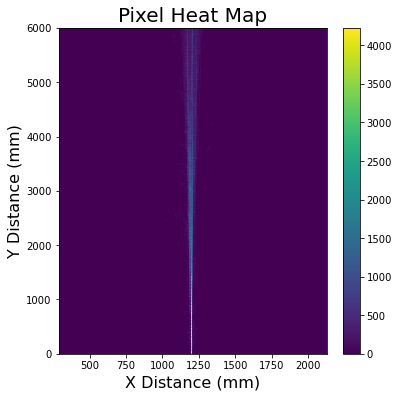

In [7]:
# ==================================================================================================
# Plot the collective x_pixels and y_pixels from the 100 events
# ==================================================================================================
# Plot dataframe's columns 'pixel_x' and 'pixel_y' on the x-axis and y-axis respectively
plt.figure(figsize=(6,6))
plt.hist2d(resets_df.pixel_x, resets_df.pixel_y, bins=(200,200)) 
# Creates colorbar, labels axes, adds title, and shows the plot.
plt.colorbar() 
plt.xlabel('X Distance (mm)', fontsize=16)
plt.ylabel('Y Distance (mm)', fontsize=16)
plt.title('Pixel Heat Map', fontsize=20)
plt.clf
plt.savefig('Muon_Output/Heat_Maps/pixel_heat_map')

# Event Plots

In [8]:
# ==================================================================================================
# Open the g4_output.txt file and read into pandas dataframe
# ==================================================================================================
# If directory, use:
# g4_df = pd.read_csv(directory_path + '/' + g4_file_name)
g4_df = pd.read_csv(g4_file_name)

for x in range(4):
    # print(resets_df[resets_df.event == x].event)
    plt.figure(figsize=(6,6))
    plt.hist2d(resets_df.pixel_x[(resets_df.event == x)], resets_df.pixel_y[(resets_df.event == x)], bins=(200,200)) 
    # Creates colorbar, labels axes, adds title, and shows the plot.
    plt.colorbar() 
    plt.xlabel('X Distance (mm)', fontsize=16)
    plt.ylabel('Y Distance (mm)', fontsize=16)
    plt.title('Pixel Heat Map - Event %d' %(x), fontsize=20)
    plt.clf()
    plt.savefig('Muon_Output/Heat_Maps/Event'+str(x))
    

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

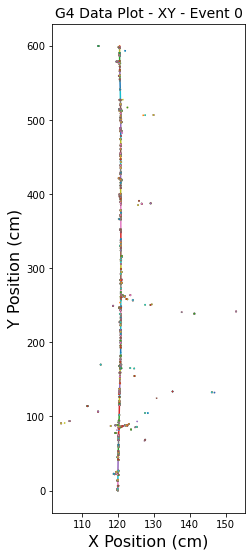

In [9]:
e = 1 
# Specifies how many events you wish to look at. 
# (for example, e = 5 will show you events 0 through 5)
for x in range(e):
    plt.figure(figsize=(3.45, 9)) # scaled to dimensions of DUNE APA scaled by 1.5
    # Plots lines from (xi, yi) to (xf, yf) for event = EVENT_NUM
    plt.plot([g4_df.xi[(g4_df.event == x)], g4_df.xf[(g4_df.event == x)]],
     [g4_df.yi[(g4_df.event == x)], g4_df.yf[(g4_df.event == x)]])
    # labels axes, adds title, and shows the plot.
    plt.xlabel('X Position (cm)', fontsize=16)
    plt.ylabel('Y Position (cm)', fontsize=16)
    plt.title('G4 Data Plot - XY - Event %d' %(x), fontsize=14)
    plt.savefig('Muon_Output/G4_Data_Plots/XY/g4_xy_Event_'+str(x))
    plt.clf
# print("out of loop")

In [10]:
for x in range(e):
    plt.figure(figsize=(9, 5.4)) # scaled to dimensions of DUNE APA scaled by 1.5
    # Plots lines from (yi, zi) to (yf, zf) for event = EVENT_NUM
    plt.plot([g4_df.yi[(g4_df.event == x)], g4_df.yf[(g4_df.event == x)]],
             [g4_df.zi[(g4_df.event == x)], g4_df.zf[(g4_df.event == x)]])
    # labels axes, adds title, and shows the plot.
    plt.xlabel('Y Position (cm)', fontsize=16)
    plt.ylabel('Z Position (cm)', fontsize=16)
    plt.title('G4 Data Plot - YZ - Event %d' %(x), fontsize=20)
    plt.savefig('Muon_Output/G4_Data_Plots/YZ/g4_yz_Event_'+str(x))
    plt.clf()


<Figure size 648x388.8 with 0 Axes>

In [11]:
for x in range(e):
    plt.figure(figsize=(3.45, 5.4)) # scaled to dimensions of DUNE APA scaled by 1.5
    # Plots lines from (yi, zi) to (yf, zf) for event = EVENT_NUM
    # Plots lines from (xi, zi) to (xf, zf) for event = EVENT_NUM
    plt.plot([g4_df.xi[(g4_df.event == x)], g4_df.xf[(g4_df.event == x)]],
     [g4_df.zi[(g4_df.event == x)], g4_df.zf[(g4_df.event == x)]])
    # labels axes, adds title, and shows the plot.
    plt.xlabel('X Position (cm)', fontsize=10)
    plt.ylabel('Z Position (cm)', fontsize=10)
    plt.title('G4 Data Plot - XZ - Event %d' %(x), fontsize=14)
    plt.savefig('Muon_Output/G4_Data_Plots/XZ/g4_xz_Event_'+str(x))
    plt.clf()

<Figure size 248.4x388.8 with 0 Axes>

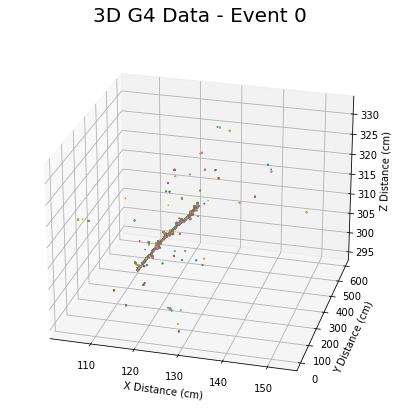

In [12]:
for x in range(e):
    fig = plt.figure()
    fig.set_size_inches(6.9, 18, 10.8) # scaled plot to dimensions DUNE APA
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X Distance (cm)', fontsize=10)
    ax.set_ylabel('Y Distance (cm)', fontsize=10)
    ax.set_zlabel('Z Distance (cm)', fontsize=10)
    ax.view_init(elev=25, azim=285) # Viewing angle: elev changes theta (from xy plane)
    #  azmin changes phi (0 = x_axis on RHS, 90 = y_axis on LHS)
    plt.title('3D G4 Data - Event %d' %(x), fontsize=20)
    # plots lines with start/end points as: (x_i, y_i, z_i) to (x_f, y_f, z_f)
    # 3D plotting requires you plot the individual lines for each row:
    # Iterates through each row in DF for the event = e
    # Plots the line for the row having coordinates(xi, yi, zi) to (xf, yf, zf) 
    for index, row in g4_df[(g4_df.event == x)].iterrows():
        ax.plot([row.xi, row.xf], [row.yi, row.yf], [row.zi, row.zf])
    plt.savefig('Muon_Output/G4_Data_Plots/3D/g4_3d_Event_'+str(x))
# print('outofloop')

# Filtering Resets and Defining New Dataframe

In [13]:
# Filter out any pixels that have resets < 8 times (less than 8 occurences in the df)

# Define a new dataframe containing event, x_pixel, y_pixel and how many resets occured at each pixel (size)
reset_num_df = resets_df.groupby(["event", "pixel_x", "pixel_y"], as_index=False).size()

# In the line above, we are defining the dataframe reset_num_df by grouping the rows by event, x_pixel, and y_pixel and
# using .size() to give us the size (number of occurences) of those groups. 

# Select only the occurences of pixels with the event == EVENT_NUM and num_resets (size) > 3
pixels_of_interest = reset_num_df[(reset_num_df["size"] >= 8)]

# merge pixels_of_interest with the resets_df based on pixels
merged_df = pixels_of_interest.merge(resets_df[["event", "pixel_x", "pixel_y", "reset_time"]], how = 'left', on = ["event", "pixel_x", "pixel_y"])

In [14]:
# Find the mean TOA (mean reset_time) for each pixel

# This can be done with .groupby().mean() as it will group the rows of the df by ["event", "pixel_x", "pixel_y"]
# and include a 4th column that is the mean of reset_time for each group

# .groupby().mean() calculates the mean of the column that wasn't included in the grouping. In our case we didn't include 
# "reset_time" in the groupby statement, so the 4th column will be the mean of each group's reset_time
"""Looks at each pixel in an event and finds the average reset time of THAT pixel."""
mean_TOA_df = merged_df[["event", "pixel_x", "pixel_y", "reset_time"]].groupby(["event", "pixel_x", "pixel_y"], as_index=False).mean()

# Renames the 4th column from reset_time -> mean_TOA. groupby() keeps the original column names
mean_TOA_df = mean_TOA_df.rename(columns = {"reset_time" : "mean_TOA"})
# print(mean_TOA_df)

In [15]:
# Similarly to the previous cell, we can find the RMS of each pixel's reset time by using .groupby().std()
main_df = merged_df[["event", "pixel_x", "pixel_y", "reset_time"]].groupby(["event", "pixel_x", "pixel_y"], as_index=False).std()

# # Renames the 4th column from reset_time -> mean_TOA. groupby() keeps the original column names
main_df = main_df.rename(columns = {"reset_time" : "RMS"})

# # Adds mean_TOA column from the mean_TOA_df
main_df['mean_TOA'] = mean_TOA_df['mean_TOA']

# Initial Functional Fit

## Relevant Functions

In [16]:
def sqrt_func(x, a):
    return a*np.sqrt(abs(x))

def gauss_f(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

def sqrt_fit_func(mean_TOA, min_RMS):
    poptsqrt, pcov = curve_fit(sqrt_func, mean_TOA, min_RMS)
    return poptsqrt, pcov

def sqrt_fit_func(mean_TOA, min_RMS, i):
    if os.path.exists("Muon_Output/Fitting_Plots/Sqrt_Fit_Plots"):
        shutil.rmtree("Muon_Output/Fitting_Plots/Sqrt_Fit_Plots")
        os.mkdir(sqrt_fit_path)
    plt.figure(figsize=(8,9))
    plt.ylim(0, 1e-06)
    plt.xlabel('Mean_TOA (sec)', fontsize=16)
    plt.ylabel('StDev_Min (sec)', fontsize=16)
    plt.title('StDev_Min vs Mean_TOA by Event', fontsize=14)
    t = np.linspace(0, mean_TOA.max(), 100)
    poptsqrt, pcov = curve_fit(sqrt_func, mean_TOA, min_RMS)
    rms_fit = []
    rms_th = []
    for I in range(len(t)):
        rms_fit.append(poptsqrt[0]*np.sqrt(t[I]))
        rms_th.append(sqrt_constant*np.sqrt(t[I]))
    plt.scatter(mean_TOA ,min_RMS , marker = '.', color='orange', label = 'RMS Min')
    plt.plot(t, rms_th, '--r', label = 'Theory') 
    plt.plot(t, rms_fit, '--b', label = 'Best Fit') 
    plt.legend(loc = 'upper left')
    plt.clf
    plt.savefig('Muon_Output/Fitting_Plots/Sqrt_Fit_Plots/sqrt_fit_'+str(i))
    return poptsqrt, pcov, rms_fit, t, rms_th, rms_fit

def gauss_fit_func(poptsqrti, delta_RMS, i):
    if os.path.exists("Muon_Output/Fitting_Plots/Gauss_Fit_Plots"):
        shutil.rmtree("Muon_Output/Fitting_Plots/Gauss_Fit_Plots")
        os.mkdir(gauss_fit_path)
    plt.figure(figsize=(8,9))
    plt.ylim(0, 15)
    plt.xlim(-.75e-07, 1.5e-07)
    plt.xlabel('Delta_StDev (sec)', fontsize=16)
    plt.title('1D Delta StDev Distribution Iteration ('+str(i)+")", fontsize=14)
    n, bins, patches = plt.hist(delta_RMS, bins = 30, color='b')   #plots the actual histogram
    binCenter = []
    for I in range(len(bins) - 1):    #Loops through the bins and finds the center of the bins
         binCenter.append((bins[I]+bins[I+1])/2)
    x = np.linspace(delta_RMS.min(), delta_RMS.max(), 100)  #Makes a set of points for curve fitting between min and max rms
    poptgauss1, pcovgauss1 = curve_fit(gauss_f, binCenter, n, p0=(max(n), delta_RMS.median(), delta_RMS.std())) #gaussian curve fitting
    amp = poptgauss1[0] #saves the amplitude from the fit
    mu = poptgauss1[1]  #saves the mu from the fit
    sigma = poptgauss1[2]  #save the std from the fit
    plt.plot(x, gauss_f(x, amp, mu, sigma), '--r')
    plt.axvline(x = 0, color = 'b', linestyle = ':', alpha = 0.5)
    plt.clf
    plt.savefig('Muon_Output/Fitting_Plots/Gauss_Fit_Plots/gauss_fit_'+str(i))
    return amp, mu, sigma

def Initial_fit_func(meanTOA_f, minRMS_f, dataframe_f):
    poptsqrt1, pcov1, rms_fit1, t1, rms_th1, rms_fit1 = sqrt_fit_func(meanTOA_f, minRMS_f, "initial")
    sqrt_fit_history = []
    sqrt_fit_history.append(poptsqrt1)
    dataframe_f["expected_RMS"] = sqrt_func(meanTOA_f, poptsqrt1[0])
    dataframe_f["delta_RMS"] = minRMS_f-dataframe_f.expected_RMS
    amp1, mu1, sigma1 = gauss_fit_func(poptsqrt1, dataframe_f.delta_RMS, "initial")
    return sqrt_fit_history

## Defining and Calculating Constants

In [17]:
# ==================================================================================================
# DEFINING AND CALCULATING CONSTANTS
# ==================================================================================================
e_vel = 164800 #cm**2/s
DiffusionL = 6.8223 #cm**2/s
DiffusionT = 13.1586 #cm**2/s
Life_Time = 0.1 #s
sqrt_constant = sqrt(2*DiffusionL)/e_vel

## Calulating Initial Fit

In [18]:
# Find the indicies for the min RMS for each event
total_events = 100

min_RMS_indices = []
for event_num in range(total_events):
    min_RMS_indices.append(main_df[(main_df["event"] == event_num)]["RMS"].idxmin())

[1.98972377e-05]


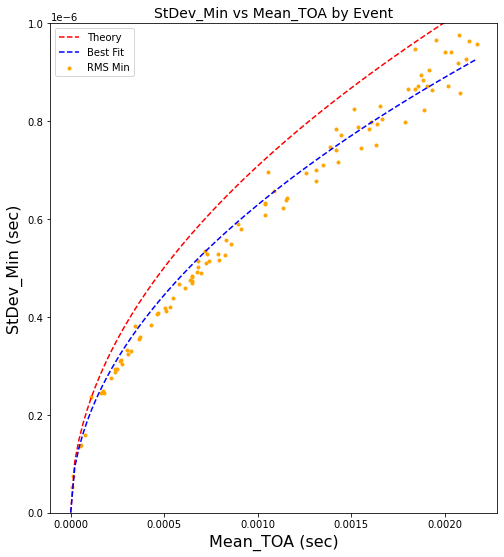

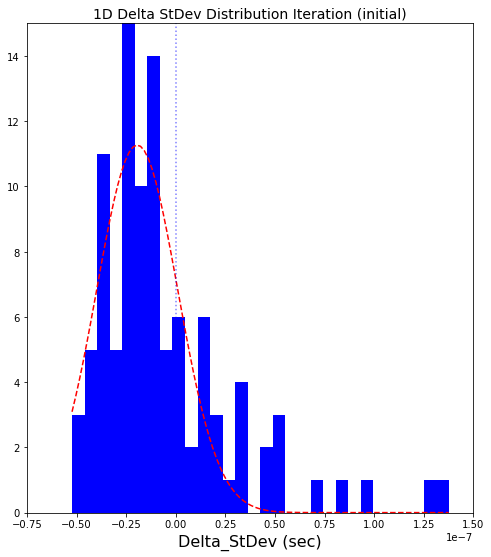

In [19]:
fit_history = Initial_fit_func(main_df.iloc[min_RMS_indices]["mean_TOA"], main_df.iloc[min_RMS_indices]["RMS"], main_df)
initial_fit = fit_history[0]
print(initial_fit)

# Finding Min RMS Values and TOA Shift

## Relevant Functions

In [20]:
def ToAShift_Index(dataframe_f, event_num_f, functionalForm_f):
    # This function will be used in a for loop for all events.
    # Get subset of dataframe consisting of rows with event = event_num_f
    event_df = dataframe_f[dataframe_f["event"] == event_num_f].copy().reset_index(drop = False)
    
    # Get the smallest StDev in the dataframe and shift it's time such that it resides on functional fit
    minRMS_index = event_df["RMS"].idxmin()
    expected_TOA = (event_df["RMS"].min()/functionalForm_f)**2
    delta_t = event_df.iloc[minRMS_index]["mean_TOA"] - expected_TOA
    
    # Shift all pixels by the calculated delta_t
    event_df["mean_TOA"] = event_df["mean_TOA"] - delta_t
    
    # In very rare case delta_t might originally be 0, still force the loop to occur
    if delta_t == 0:
        delta_t = float('inf')
    
    while delta_t != 0:
        
        # Get the expected RMS for a given time and the corresponding delta_StDev
        event_df["Expected_RMS"] = sqrt_func(event_df["mean_TOA"], functionalForm_f)
        event_df["delta_StDev"] = event_df["RMS"] - event_df["Expected_RMS"]
        
        # Find the smallest delta_StDev and shift it's time such that it resides on functional fit
        min_deltaRMS_index = event_df["delta_StDev"].idxmin()
        expected_TOA = (event_df.iloc[min_deltaRMS_index]["RMS"]/functionalForm_f)**2
        delta_t = event_df.iloc[min_deltaRMS_index]["mean_TOA"] - expected_TOA
        
        # Shift all pixels by the calculated delta_t
        event_df["mean_TOA"] = event_df["mean_TOA"] - delta_t 
        
    pixel_id = event_df.iloc[event_df['delta_StDev'].idxmin()]['index']
    return pixel_id

In [21]:
# Get new list of indices for smallest delta_StDev
min_deltaRMS_indices = []
for event_num in range(total_events):
    min_deltaRMS_indices.append(ToAShift_Index(main_df, event_num, initial_fit))

# Create list of event numbers that were changed after ToA shifting (a new pixel is being fitted with the functional form).
changed =[]
for i in range(0, len(min_RMS_indices)):
    if min_RMS_indices[i] != min_deltaRMS_indices[i]:
        changed.append(i)
changed

# dataframe_f.loc[delta_rms_min_idx, "min_pixel?"] = True
# print(RMS_df)

# Use this to edit the outliers loop:
# print(main_df.iloc[min_deltaRMS_indices]["mean_TOA"])

[17, 18, 57, 73, 74, 79, 81, 89]

# Removing Outliers and Fitting

## Relevant Functions:

In [22]:
def rm_outliers_func(dataframe_f):
    change = True
    outliers_idx = []
    while change:
        mu = dataframe_f[dataframe_f["event_outlier"] == False]["delta_RMS"].mean()
        sigma = dataframe_f[dataframe_f["event_outlier"] == False]["delta_RMS"].std()
        print("mu is "+ str(mu)+" and sigma is " + str(sigma))
        dataframe_f["Chi^2_Value"] = (mu - dataframe_f["delta_RMS"])**2 / sigma**2
        max_chi2_idx = dataframe_f[dataframe_f["event_outlier"] == False]["Chi^2_Value"].idxmax
        if dataframe_f.loc[max_chi2_idx, "event_outlier"] == False and dataframe_f.loc[max_chi2_idx, "Chi^2_Value"] >= 9:
            dataframe_f.loc[max_chi2_idx, "event_outlier"] = True
            outliers_idx.append(max_chi2_idx)
        else:
            change = False
    return outliers_idx

def outliers_loop_func(dataframe_f, min_deltaRMS_indices):
    dataframe_f["event_outlier"] = True
    dataframe_f.loc[min_deltaRMS_indices, "event_outlier"] = False
    outliers_idx = rm_outliers_func(dataframe_f)
    poptsqrti, pcovi, rms_fiti, ti, rms_thi, rms_fiti = sqrt_fit_func(dataframe_f[(dataframe_f["event_outlier"] == False)].mean_TOA, dataframe_f[(dataframe_f["event_outlier"] == False)].RMS, "Removed Outliers")
    print("Functional Form Constant = " +str(poptsqrti))
    return outliers_idx, poptsqrti
    

mu is -5.4459327566694875e-09 and sigma is 3.6344085962466136e-08
mu is -7.017672038983163e-09 and sigma is 3.3253125945945475e-08
mu is -8.502700546375685e-09 and sigma is 3.0253210153170384e-08
mu is -9.67012061782487e-09 and sigma is 2.831263426716845e-08
mu is -1.0759136106444274e-08 and sigma is 2.6534052145721214e-08
mu is -1.1683133350095076e-08 and sigma is 2.522374187661929e-08
Functional Form Constant = [1.96359627e-05]


<function matplotlib.pyplot.show(close=None, block=None)>

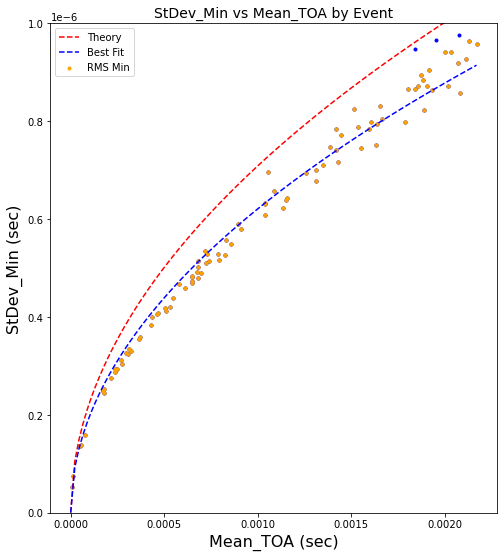

In [23]:
outliers_idx, functional_form = outliers_loop_func(main_df, min_deltaRMS_indices)


plt.scatter(main_df.iloc[min_deltaRMS_indices]["mean_TOA"], main_df.iloc[min_deltaRMS_indices]["RMS"], marker = '.', color='blue', label = 'Outliers')
plt.scatter(main_df[(main_df["event_outlier"] == False)].mean_TOA, main_df[(main_df["event_outlier"] == False)].RMS , marker = '.', color='orange', label = 'RMS Min')
# plt.scatter(main_df.iloc[outliers_idx]["mean_TOA"], main_df.iloc[outliers_idx]["RMS"], marker = '.', color='blue', label = 'Outliers')
plt.legend
plt.show

# print(outliers_idx)

# Finding Delta t0 using Delta TOA

In [24]:
copied = main_df.copy().reset_index(drop = True)
t0_df = 0

In [25]:
main_df['Expected_ToF'] = (main_df.iloc[min_deltaRMS_indices]['RMS'] / functional_form)**2
t0_df = pd.DataFrame(data = {'event' : range(total_events), 't0' : (main_df.iloc[min_deltaRMS_indices]['mean_TOA'] - \
                                                                    main_df.iloc[min_deltaRMS_indices]['Expected_ToF'])})
main_df = main_df.merge(t0_df, how = 'left', on = 'event').copy().reset_index(drop = True)

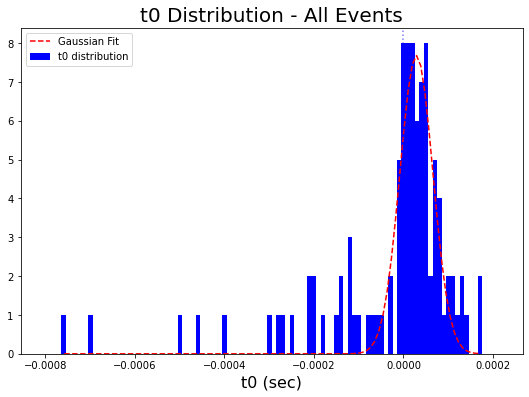

Gaussian Parameters: Amp: 7.67946E+00, Mu: 2.88706E-05, Sigma: 3.69540E-05


In [26]:
binWidth = 10e-06

plt.hist(main_df.iloc[min_deltaRMS_indices]['t0'])
xmin, xmax = plt.xlim()
plt.close()

plt.figure(figsize = (9,6))
plt.xlabel('t0 (sec)', fontsize = 16)
plt.title('t0 Distribution - All Events', fontsize = 20)


# Plot histogram based on bins defined by plot limits
plt.hist(main_df.iloc[min_deltaRMS_indices]['t0'], bins = np.arange(xmin, xmax, binWidth))

# Get a gaussian fit to the distribution
# t0_gauss_params, hist_data = gauss_fit_func(main_df.iloc[min_deltaRMS_indices]['t0'], 
#                                           np.arange(xmin, xmax, binWidth)) 

n, bins, patches = plt.hist(main_df.iloc[min_deltaRMS_indices]['t0'], bins = np.arange(xmin, xmax, binWidth), color='b', label = "t0 distribution")   #plots the actual histogram
binCenter = []
for i in range(len(bins) - 1):    #Loops through the bins and finds the center of the bins
     binCenter.append((bins[i]+bins[i+1])/2)
x = np.linspace(main_df.iloc[min_deltaRMS_indices]['t0'].min(), main_df.iloc[min_deltaRMS_indices]['t0'].max(), 100)  #Makes a set of points for curve fitting between min and max rms
poptgauss1, pcovgauss1 = curve_fit(gauss_f, binCenter, n, p0=(max(n), main_df.iloc[min_deltaRMS_indices]['t0'].median(), main_df.iloc[min_deltaRMS_indices]['t0'].std())) #gaussian curve fitting
amp = poptgauss1[0] #saves the amplitude from the fit
mu = poptgauss1[1]  #saves the mu from the fit
sigma = poptgauss1[2]  #save the std from the fit
plt.plot(x, gauss_f(x, amp, mu, sigma), '--r', label = "Gaussian Fit")
plt.axvline(x = 0, color = 'b', linestyle = ':', alpha = 0.5)
plt.legend(loc = 'upper left')
plt.show()
print('Gaussian Parameters: Amp: %3.5E, Mu: %3.5E, Sigma: %3.5E' %(amp, mu, 
                                                                 sigma))
# # Plot the Gaussian Fit
# xs = np.linspace(xmin, xmax, 1000)
# ys = gaussFunc(xs, *t0_gauss_params)
# plt.plot(xs, ys, '--', color = 'crimson', label = 'Gaussian Fit')

# # Plot vertical line at t = 0
# x = [0]*2
# y = np.linspace(0, hist_data['yvalues'].max(), 2)
# plt.plot(x, y, '--', color = 'lime')

# # Show and close plot
# plt.show()
# plt.close()

# # Print distribution gaussian parameters
# print('Gaussian Parameters: A: %3.5E, mu: %3.5E, sigma: %3.5E' %(t0_gauss_params[0], t0_gauss_params[1], 
#                                                                  t0_gauss_params[2]))



# Event Reconstruction

## Relevant Functions:

In [30]:
def calc_z_value_func(dataframe_f):
    e_vel = 1.648 * 10**6 # mm/s
    dataframe_f["z_position"] = (dataframe_f['mean_TOA'] - dataframe_f['t0'])*e_vel

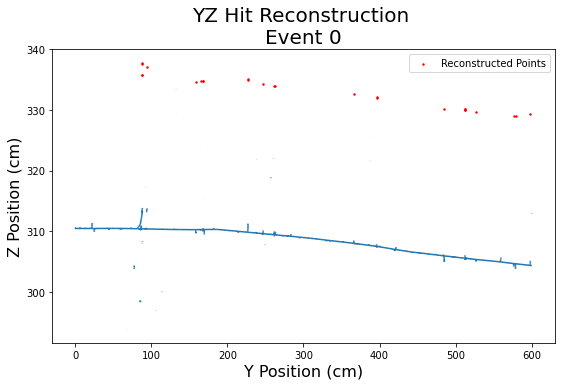

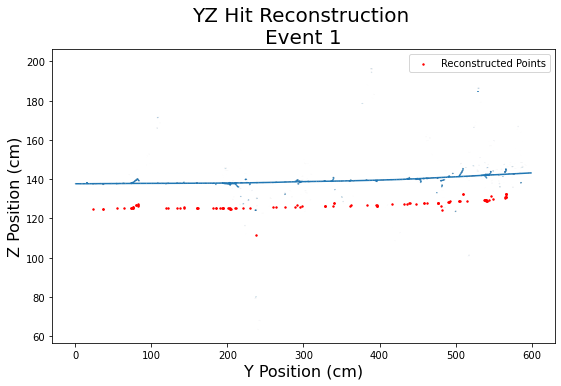

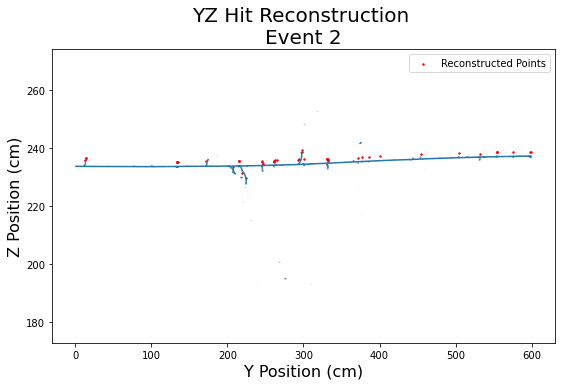

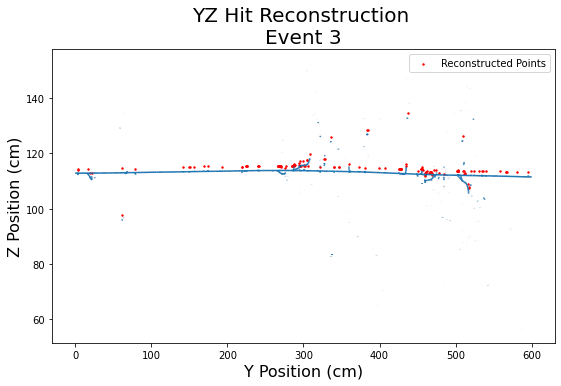

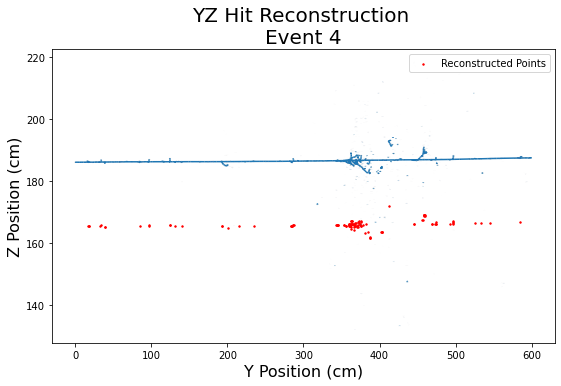

In [31]:
main_df['x_position'] = main_df.pixel_x
main_df['y_position'] = main_df.pixel_y
calc_z_value_func(main_df)
total_events = 5
for n in range(total_events):
    # Changes datafram ecolumns to arrays
    yi = pd.DataFrame(data = {"yi" : g4_df[g4_df["event"] == n]["yi"]}).to_numpy()
    zi = pd.DataFrame(data = {"zi" : g4_df[g4_df["event"] == n]["zi"]}).to_numpy()
    yf = pd.DataFrame(data = {"yf" : g4_df[g4_df["event"] == n]["yf"]}).to_numpy()
    zf = pd.DataFrame(data = {"zf" : g4_df[g4_df["event"] == n]["zf"]}).to_numpy()

    # Combines the 1D arrays to one 2D array
    initials = np.column_stack((yi, zi))
    finals = np.column_stack((yf, zf))

    # Combine to two arrays to one array with row = [[yi, zi], [yf, zf]]
    combined = np.zeros((len(initials), 2, 2))
    combined[:, 0] = initials
    combined[:, 1] = finals

    # Plot all the G4 data overlayed with the reconstruction data for all events:
    # Create the plot
    fig, ax = plt.subplots()
    fig.set_figheight(5.4)
    fig.set_figwidth(9)

    # Label the axes for the plot
    ax.set_title('YZ Hit Reconstruction \nEvent %d' %n, fontsize=20)
    ax.set_xlabel('Y Position (cm)', fontsize=16)
    ax.set_ylabel('Z Position (cm)', fontsize=16)
    
    
    # Plot the G4 data via Line Collections
    line_segments = LineCollection(combined)
    ax.add_collection(line_segments)
    ax.autoscale()
    
    
    # Plot the points from the t0 values
    # Divide by 10 to convert from mm to cm (G4 is in cm)
    ax.scatter(main_df.y_position[(main_df.event == n)]/10, 
                main_df.z_position[(main_df.event == n)]/10, s = 2, color = 'red', 
                label = 'Reconstructed Points')

    plt.legend()
    plt.show()
    plt.close()
